## Scripting mit 3D Vektordaten

### swissBOUNDARIES3D von swisstopo

https://www.swisstopo.admin.ch/de/geodata/landscape/boundaries3d.html

* Administrative Einheiten der Schweiz
* 3D: Die Grenzen wurden auf das digitale Höhenmodell swissALTI3D projiziert.

Download: als zip Archiv https://cms.geo.admin.ch/ogd/topography/swissBOUNDARIES3D.zip 

Die Daten sind auf dem Server bereits abgelegt unter:

    /data/geo/opengeodata/BOUNDARIES_2021_04/DATEN/swissBOUNDARIES3D/

Die Daten sind als DXF, GDB, Interlis und Shapefile vorhanden.

Wird dieses Notebook lokal ausgeführt müssen die Daten über den Link oben zunächst heruntergeladen und entpackt werden und der Pfad entsprechend angepasst.

In [1]:
import geopandas as gpd
import pandas as pd
import shapely
import geopandas_stac as stac

In [2]:
# Basis-Pfad ggf. anpassen
basedir = "/data/geo/opengeodata/BOUNDARIES_2021_04/DATEN/swissBOUNDARIES3D/"

gdb = basedir + "FGDB/swissBOUNDARIES3D_1_3_LV95_LN02.gdb"

In [3]:
import fiona

fiona.listlayers(gdb)

['TLM_LANDESGEBIET',
 'TLM_KANTONSGEBIET',
 'TLM_HOHEITSGRENZE',
 'TLM_HOHEITSGEBIET',
 'TLM_BEZIRKSGEBIET']

In [4]:
df = gpd.read_file(gdb, driver='FileGDB', layer="TLM_KANTONSGEBIET")

In [5]:
len(df)

51

In [6]:
df.head()

,UUID,DATUM_AENDERUNG,DATUM_ERSTELLUNG,ERSTELLUNG_JAHR,ERSTELLUNG_MONAT,REVISION_JAHR,REVISION_MONAT,GRUND_AENDERUNG,HERKUNFT,HERKUNFT_JAHR,...,SEE_FLAECHE,REVISION_QUALITAET,KANTONSFLAECHE,KANTON_TEIL,NAME,ICC,EINWOHNERZAHL,Shape_Length,Shape_Area,geometry
0,{0B2364ED-49E0-4D53-A33C-C684DD530B57},2018-11-22T13:38:04,2012-10-26T12:21:31,2012,10,2021,4,400,500,2019,...,NaN,2020_Aufbau,710530.0,0,Graubünden,CH,199021.0,758037.412184,7.105296e+09,MULTIPOLYGON Z (((2735215.665 1194955.161 2870...
1,{DDD56CEF-0E61-4EED-85ED-F67A459C93ED},2019-11-06T07:57:58,2012-10-26T12:21:31,2012,10,2021,4,400,100,2019,...,11897.0,2020_Aufbau,595951.0,1,Bern,CH,1039474.0,747009.909625,5.950465e+09,MULTIPOLYGON Z (((2595241.510 1169313.283 2090...
2,{54B25E50-30A7-4995-ADE3-5FFF6E13A995},2018-11-22T13:38:04,2012-10-26T12:21:31,2012,10,2021,4,400,500,2019,...,1060.0,2020_Aufbau,522463.0,0,Valais,CH,345525.0,549337.990148,5.224632e+09,MULTIPOLYGON Z (((2601807.628 1136116.778 2948...
3,{921DFEF2-6D91-4CB8-9CFC-2A831C412020},2019-11-06T07:57:58,2012-10-26T12:21:31,2012,10,2021,4,400,100,2019,...,39097.0,2020_Aufbau,321202.0,1,Vaud,CH,805098.0,566188.553337,3.118553e+09,MULTIPOLYGON Z (((2555092.813 1138713.419 372....
4,{95F10F52-8B2F-4D6A-AF7E-D4F915E42F89},2020-11-19T10:37:08,2012-10-26T12:21:31,2012,10,2021,4,400,500,2020,...,7147.0,2020_Aufbau,281215.0,0,Ticino,CH,351491.0,363081.089239,2.812148e+09,MULTIPOLYGON Z (((2727358.511 1119219.094 1351...


In [7]:
df_bern = df.query("NAME == 'Bern'")

In [8]:
df_bern

,UUID,DATUM_AENDERUNG,DATUM_ERSTELLUNG,ERSTELLUNG_JAHR,ERSTELLUNG_MONAT,REVISION_JAHR,REVISION_MONAT,GRUND_AENDERUNG,HERKUNFT,HERKUNFT_JAHR,...,SEE_FLAECHE,REVISION_QUALITAET,KANTONSFLAECHE,KANTON_TEIL,NAME,ICC,EINWOHNERZAHL,Shape_Length,Shape_Area,geometry
1,{DDD56CEF-0E61-4EED-85ED-F67A459C93ED},2019-11-06T07:57:58,2012-10-26T12:21:31,2012,10,2021,4,400,100,2019,...,11897.0,2020_Aufbau,595951.0,1,Bern,CH,1039474.0,747009.909625,5.950465e+09,MULTIPOLYGON Z (((2595241.510 1169313.283 2090...
38,{16290FD6-3382-4770-90CD-97F6179C1522},2015-12-08T15:35:39,2012-10-26T12:21:31,2012,10,2021,4,400,500,2015,...,NaN,2020_Aufbau,NaN,2,Bern,CH,NaN,9983.836298,5.560379e+06,MULTIPOLYGON Z (((2609050.776 1241284.175 1141...
41,{7EC7834A-382D-4ECC-AA08-2071B6DD3D3D},2015-12-08T15:35:39,2012-10-26T12:21:31,2012,10,2021,4,400,500,2015,...,NaN,2020_Aufbau,NaN,3,Bern,CH,NaN,7366.252281,2.478460e+06,MULTIPOLYGON Z (((2575623.784 1194637.338 535....
44,{584BC1F5-90BC-4B6A-B467-8E05ADE9A187},2015-12-08T15:35:39,2012-10-26T12:21:29,2012,10,2021,4,400,500,2015,...,NaN,2020_Aufbau,NaN,4,Bern,CH,NaN,5389.715293,1.003047e+06,MULTIPOLYGON Z (((2573485.079 1193470.596 494....


In [9]:
df_bern["geometry"]
#kanton plus 3 exklaven

1     MULTIPOLYGON Z (((2595241.510 1169313.283 2090...
38    MULTIPOLYGON Z (((2609050.776 1241284.175 1141...
41    MULTIPOLYGON Z (((2575623.784 1194637.338 535....
44    MULTIPOLYGON Z (((2573485.079 1193470.596 494....
Name: geometry, dtype: geometry

<AxesSubplot:>

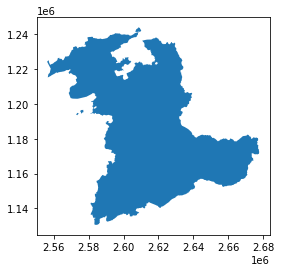

In [10]:
df_bern.plot()

<AxesSubplot:>

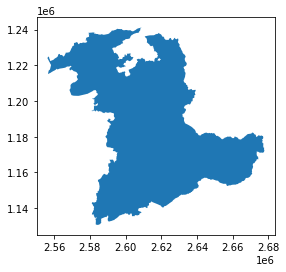

In [11]:
df_bern.query("KANTON_TEIL == 1").plot()

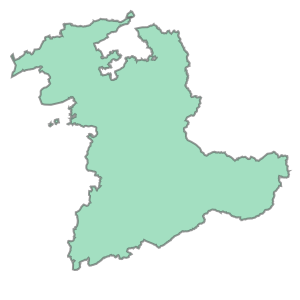

In [12]:
polygon_bern = df_bern["geometry"].unary_union
polygon_bern

In [13]:
polygon_bern.area

5959507057.104865

In [14]:
kantonsnamen = df["NAME"].unique()
kantonsnamen

array(['Graubünden', 'Bern', 'Valais', 'Vaud', 'Ticino', 'St. Gallen',
       'Zürich', 'Fribourg', 'Luzern', 'Aargau', 'Uri', 'Thurgau',
       'Schwyz', 'Jura', 'Neuchâtel', 'Solothurn', 'Glarus',
       'Basel-Landschaft', 'Obwalden', 'Nidwalden', 'Genève',
       'Schaffhausen', 'Appenzell Ausserrhoden', 'Zug',
       'Appenzell Innerrhoden', 'Basel-Stadt'], dtype=object)


### swissTLM3D von swisstopo

https://www.swisstopo.admin.ch/de/geodata/landscape/tlm3d.html

* swissTLM3D ist das grossmassstäbliche Topografische Landschaftsmodell der Schweiz
* Umfasst die natürlichen und künstlichen Objekte wie auch die Namendaten in vektorieller Form.
* Hohen Genauigkeit
* Einbezug der dritten Dimension 
* Der genaueste und umfassendste 3D-Vektordatensatz der Schweiz

Download: über STAC API: "ch.swisstopo.swisstlm3d"

In [15]:
df = stac.getAssets("ch.swisstopo.swisstlm3d")

In [16]:
len(df)

6

In [17]:
df.head(2)

,name,type,bbox,created,updated,href,proj,gsd,variant,checksum,geometry
0,swisstlm3d_2020-03_2056_5728.gdb.zip,application/x.filegdb+zip,"[5.350513, 45.643491, 11.477436, 48.300071]",2021-02-08T16:57:40.988350Z,2021-02-08T16:57:40.988368Z,https://data.geo.admin.ch/ch.swisstopo.swisstl...,2056,0,base,122090b430c3aa531b1fddd7d05fe06c009b663daccf6a...,"POLYGON ((11.47744 45.64349, 5.35051 45.64349,..."
1,swisstlm3d_2020-03_2056_5728.shp.zip,application/x.shapefile+zip,"[5.350513, 45.643491, 11.477436, 48.300071]",2021-02-08T16:57:24.677598Z,2021-02-08T16:57:24.677615Z,https://data.geo.admin.ch/ch.swisstopo.swisstl...,2056,0,base,122074ed67907bd3010a3a3c3fc5447a24ce14c0b5c191...,"POLYGON ((11.47744 45.64349, 5.35051 45.64349,..."


In [18]:
print ( list(df['type'].unique()) )

['application/x.filegdb+zip', 'application/x.shapefile+zip', 'application/x.interlis+zip; version=2.3']


In [19]:
df_gdb = df.query('type == "application/x.filegdb+zip"') 

In [20]:
df_gdb

,name,type,bbox,created,updated,href,proj,gsd,variant,checksum,geometry
0,swisstlm3d_2020-03_2056_5728.gdb.zip,application/x.filegdb+zip,"[5.350513, 45.643491, 11.477436, 48.300071]",2021-02-08T16:57:40.988350Z,2021-02-08T16:57:40.988368Z,https://data.geo.admin.ch/ch.swisstopo.swisstl...,2056,0,base,122090b430c3aa531b1fddd7d05fe06c009b663daccf6a...,"POLYGON ((11.47744 45.64349, 5.35051 45.64349,..."
3,swisstlm3d_2021-04_2056_5728.gdb.zip,application/x.filegdb+zip,"[5.2229406, 45.3204053, 11.2575962, 48.2425816]",2021-04-14T13:32:09.936654Z,2021-04-14T13:32:09.936671Z,https://data.geo.admin.ch/ch.swisstopo.swisstl...,2056,0,base,1220D5CDD79CB5BDC146D310DB7846BD279AAFED92E3BC...,"POLYGON ((5.33859 45.35949, 5.22294 48.24258, ..."


In [21]:
urls = stac.getUrlList(df_gdb)
urls

['https://data.geo.admin.ch/ch.swisstopo.swisstlm3d/swisstlm3d_2020-03/swisstlm3d_2020-03_2056_5728.gdb.zip',
 'https://data.geo.admin.ch/ch.swisstopo.swisstlm3d/swisstlm3d_2021-04/swisstlm3d_2021-04_2056_5728.gdb.zip']

In [22]:
urls[-1]

'https://data.geo.admin.ch/ch.swisstopo.swisstlm3d/swisstlm3d_2021-04/swisstlm3d_2021-04_2056_5728.gdb.zip'

Das gdb ist auch bereits auf dem Server zu finden:

    "/data/geo/opengeodata/2021_SWISSTLM3D_FGDB101_CHLV95_LN02/"

In [23]:
basedir = "/data/geo/opengeodata/2021_SWISSTLM3D_FGDB101_CHLV95_LN02/"

gdb = basedir + "SWISSTLM3D_2021_LV95_LN02.gdb"

In [24]:
layers = fiona.listlayers(gdb)

In [25]:
layers

['TLM_STRASSENROUTE',
 'TLM_SCHULE',
 'TLM_GLAMOS',
 'TLM_STRASSENNAME',
 'TLM_STRASSE',
 'TLM_STRASSENINFO',
 'TLM_AUS_EINFAHRT',
 'TLM_STEHENDES_GEWAESSER',
 'TLM_FLIESSGEWAESSER',
 'TLM_EINZELBAUM_GEBUESCH',
 'TLM_BODENBEDECKUNG',
 'TLM_GELAENDENAME',
 'TLM_SIEDLUNGSNAME',
 'TLM_GEBIETSNAME',
 'TLM_FLURNAME',
 'TLM_NAME_PKT',
 'TLM_NUTZUNGSAREAL',
 'TLM_SCHUTZGEBIET',
 'TLM_FREIZEITAREAL',
 'TLM_VERKEHRSAREAL',
 'TLM_EINZELOBJEKT',
 'TLM_UEBRIGE_BAHN',
 'TLM_EISENBAHN',
 'TLM_HALTESTELLE',
 'TLM_SCHIFFFAHRT',
 'TLM_GEBAEUDE_FOOTPRINT',
 'TLM_MAUER',
 'TLM_SPORTBAUTE_PLY',
 'TLM_VERBAUUNG',
 'TLM_VERKEHRSBAUTE_LIN',
 'TLM_VERSORGUNGS_BAUTE_PKT',
 'TLM_VERKEHRSBAUTE_PLY',
 'TLM_STAUBAUTE',
 'TLM_VERSORGUNGS_BAUTE_LIN',
 'TLM_SPORTBAUTE_LIN']

In [26]:
import fiona

footprint_layer = fiona.open(gdb, 'r', layer='TLM_GEBAEUDE_FOOTPRINT')

i = iter(footprint_layer)

footprint = next(i)
footprint

{'type': 'Feature',
 'id': '1',
 'properties': OrderedDict([('UUID', '{B05C93DB-C88D-47AD-A842-638A95C8E718}'),
              ('DATUM_AENDERUNG', '2021-01-27T10:36:42'),
              ('DATUM_ERSTELLUNG', '2008-03-19T00:00:00'),
              ('ERSTELLUNG_JAHR', 2002),
              ('ERSTELLUNG_MONAT', 6),
              ('REVISION_JAHR', 2019),
              ('REVISION_MONAT', 6),
              ('GRUND_AENDERUNG', 400),
              ('HERKUNFT', 100),
              ('HERKUNFT_JAHR', 2019),
              ('HERKUNFT_MONAT', 6),
              ('REVISION_QUALITAET', '2020_Akt'),
              ('OBJEKTART', 0),
              ('NUTZUNG', 'Schiessstand'),
              ('TLM_BAUTEN_NAME_UUID',
               '{41C949A2-9F7B-41EE-93FD-631B76F2176D}'),
              ('NAME', 'Altdorf 300m'),
              ('SHAPE_Length', 45.023875051788735),
              ('SHAPE_Area', 125.47043700012277)]),
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[(2691247.085000001, 1293510.989, 523.44000

In [27]:
from shapely.geometry import mapping, shape

geom = shape(footprint['geometry'])


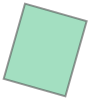

In [28]:
geom

##### Konversion zu GeoPandas

Eine einzelne GeoPandas Zeile kann damit erstellt werden.






In [29]:
gs = gpd.GeoSeries([geom])
df = pd.DataFrame([footprint['properties']])
gdf = gpd.GeoDataFrame(df, geometry=gs)

In [30]:
gdf

,UUID,DATUM_AENDERUNG,DATUM_ERSTELLUNG,ERSTELLUNG_JAHR,ERSTELLUNG_MONAT,REVISION_JAHR,REVISION_MONAT,GRUND_AENDERUNG,HERKUNFT,HERKUNFT_JAHR,HERKUNFT_MONAT,REVISION_QUALITAET,OBJEKTART,NUTZUNG,TLM_BAUTEN_NAME_UUID,NAME,SHAPE_Length,SHAPE_Area,geometry
0,{B05C93DB-C88D-47AD-A842-638A95C8E718},2021-01-27T10:36:42,2008-03-19T00:00:00,2002,6,2019,6,400,100,2019,6,2020_Akt,0,Schiessstand,{41C949A2-9F7B-41EE-93FD-631B76F2176D},Altdorf 300m,45.023875,125.470437,MULTIPOLYGON Z (((2691247.085 1293510.989 523....


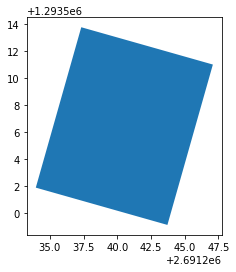

In [31]:
gdf.plot();

GeoDataFrame mit mehreren Einträgen erstellen:

mehrere: Listen mit Geometrie und Attributen erstellen und damit GeoSeries und DataFrame erstellen:

    gs = gpd.GeoSeries([geom1, geom2, geom3, geom4, ...])
    df = pd.DataFrame([attrib1, attrib2, attrib3, attrib4, ... ])
    gdf = gpd.GeoDataFrame(df, geometry=gs)

In [32]:
# nebenbei: umgekehrt von shapely nach GeoJSON geht mit "mapping": 

mapping(geom)

{'type': 'MultiPolygon',
 'coordinates': [(((2691247.085000001, 1293510.989, 523.4400000000023),
    (2691245.960999999, 1293507.0240000002, 523.5570000000007),
    (2691244.8379999995, 1293503.0579999983, 523.551999999996),
    (2691243.7140000015, 1293499.0929999985, 523.5629999999946),
    (2691239.563000001, 1293500.2690000013, 523.7709999999934),
    (2691236.7569999993, 1293501.0639999993, 523.8910000000033),
    (2691233.9510000013, 1293501.859000001, 523.903999999995),
    (2691235.0749999993, 1293505.8249999993, 523.9279999999999),
    (2691236.199000001, 1293509.789999999, 523.9980000000069),
    (2691237.322999999, 1293513.756000001, 524.1989999999932),
    (2691240.1290000007, 1293512.9609999992, 523.2639999999956),
    (2691242.9349999987, 1293512.1660000011, 522.5179999999964),
    (2691247.085000001, 1293510.989, 523.4400000000023)),)]}

In [33]:
footprint = next(i)
footprint

{'type': 'Feature',
 'id': '2',
 'properties': OrderedDict([('UUID', '{E00FC588-4B87-4CA3-929F-1D661F403A48}'),
              ('DATUM_AENDERUNG', '2016-07-19T17:18:33'),
              ('DATUM_ERSTELLUNG', '2008-03-19T00:00:00'),
              ('ERSTELLUNG_JAHR', 2002),
              ('ERSTELLUNG_MONAT', 6),
              ('REVISION_JAHR', 2019),
              ('REVISION_MONAT', 6),
              ('GRUND_AENDERUNG', 400),
              ('HERKUNFT', 100),
              ('HERKUNFT_JAHR', 2015),
              ('HERKUNFT_MONAT', 6),
              ('REVISION_QUALITAET', '2020_Akt'),
              ('OBJEKTART', 13),
              ('NUTZUNG', None),
              ('TLM_BAUTEN_NAME_UUID', None),
              ('NAME', None),
              ('SHAPE_Length', 57.1818059522939),
              ('SHAPE_Area', 169.27301551558983)]),
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[(2691748.1510000005,
      1292579.0489999987,
      564.8469999999943),
     (2691744.2760000005, 1292577.8920000

#### Beschreibung der Attribute:

<a href="https://www.swisstopo.admin.ch/content/swisstopo-internet/de/geodata/landscape/tlm3d/_jcr_content/contentPar/tabs_copy/items/dokumente/tabPar/downloadlist/downloadItems/441_1618774195491.download/2021_04_swissTLM3D_1_9_OK_d_bf.pdf">2021_04_swissTLM3D_1_9_OK_d_bf.pdf</a>


In [37]:
footprint_layer = fiona.open(gdb, 'r', layer='TLM_GEBAEUDE_FOOTPRINT')

i = iter(footprint_layer)

ph=0
cnt=0

for element in i:
    cnt = cnt+1
    if element['properties']['NUTZUNG'] == 'Parkhaus':
        ph = ph+1
        

footprint_layer.close()


print("Anzahl Parkhäuser:", ph)
print("Anzahl Gebäude im Datensatz:", cnt)


Anzahl Parkhäuser: 136
Anzahl Gebäude im Datensatz: 3815529


In [36]:
footprint_layer = fiona.open(gdb, 'r', layer='TLM_GEBAEUDE_FOOTPRINT')

i = iter(footprint_layer)

ph=0
cnt=0

for element in i:
    cnt = cnt+1
    if element['properties']['NUTZUNG'] == 'Schiessstand':
        ph = ph+1
        

footprint_layer.close()


print("Anzahl Schiessstände:", ph)
print("Anzahl Gebäude im Datensatz:", cnt)


Anzahl Schiessstände: 3016
Anzahl Gebäude im Datensatz: 3815529


Vorteil von Fiona: Geht einzeln durch alle Einträge durch, lädt also nicht so viel in die Memory